In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the dataset
# Replace 'Traffic.csv' with the actual file path if it's not in the same directory
data = pd.read_csv('Traffic.csv')

# Display the first few rows of the dataset
data.head()


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


Missing values per column:
Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

Basic statistical summary:
              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  2976.000000  2976.000000  2976.000000  2976.000000  2976.000000   
mean     16.000000    68.696573    14.917339    15.279570    15.324933   
std       8.945775    45.850693    12.847518    14.341986    10.603833   
min       1.000000     6.000000     0.000000     0.000000     0.000000   
25%       8.000000    19.000000     5.000000     1.000000     6.000000   
50%      16.000000    64.000000    12.000000    12.000000    14.000000   
75%      24.000000   107.000000    22.000000    25.000000    23.000000   
max      31.000000   180.000000    70.000000    50.000000    40.000000   

             Total  
count  2976.000000  
mean    114.2184

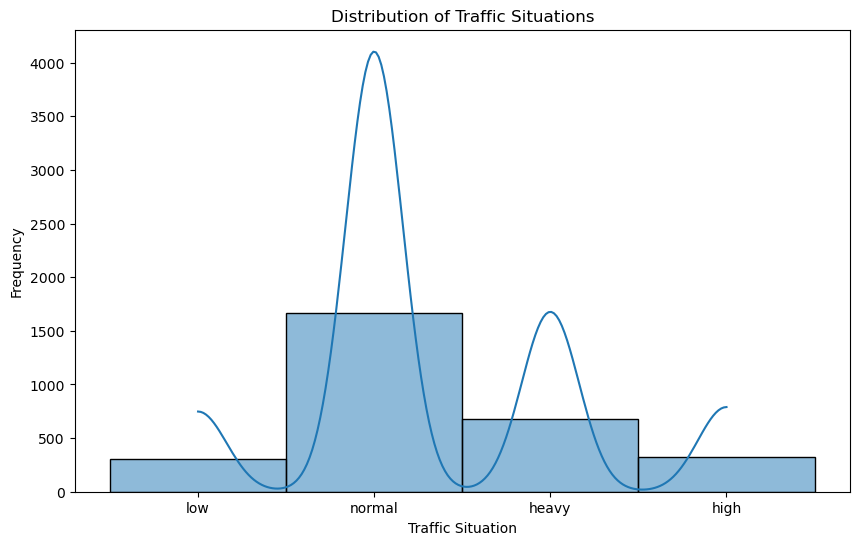

<Figure size 1000x600 with 0 Axes>

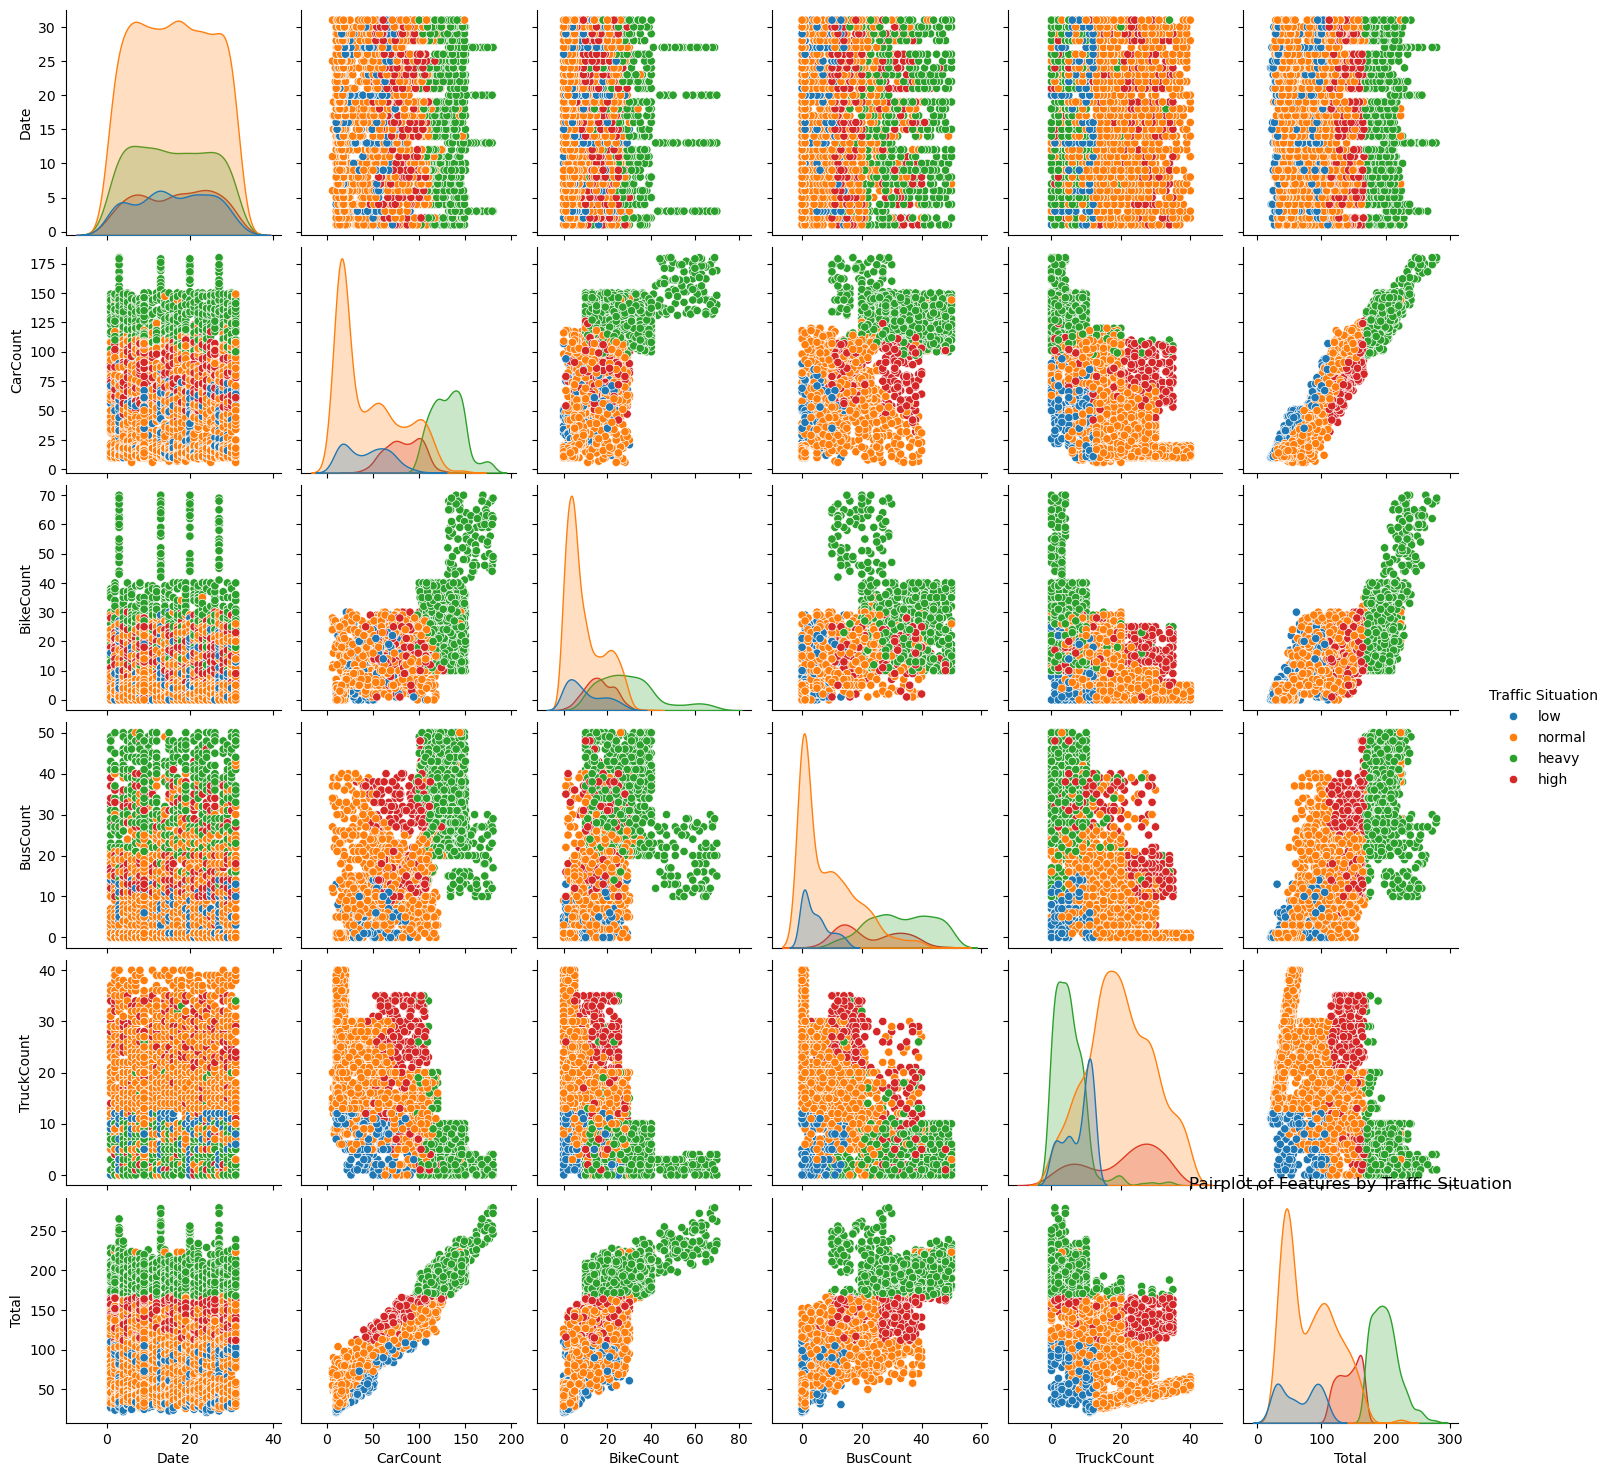

In [7]:
# Checking for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Displaying basic statistics
print("\nBasic statistical summary:")
print(data.describe())

# Visualizing the distribution of vehicle types and traffic situations
plt.figure(figsize=(10, 6))
sns.histplot(data['Traffic Situation'], kde=True)
plt.title("Distribution of Traffic Situations")
plt.xlabel("Traffic Situation")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.pairplot(data, hue="Traffic Situation")
plt.title("Pairplot of Features by Traffic Situation")
plt.show()


In [15]:
# Identifying non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Converting categorical columns to numerical (e.g., Time and Day of the week)
# We can use one-hot encoding for 'Day of the week' and convert 'Time' to an integer format (hours)
X['Day of the week'] = pd.Categorical(X['Day of the week']).codes

# Optionally, if you want to use Time as a feature, convert it to hour of the day.
# This assumes 'Time' is in HH:MM format.
X['Time'] = pd.to_datetime(X['Time'], format='%I:%M:%S %p').dt.hour

# Check if the conversion is successful
print("\nUpdated Data Types:")
print(X.dtypes)

# Splitting the dataset again into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Non-numeric columns: Index(['Time', 'Day of the week'], dtype='object')

Updated Data Types:
Time               int32
Date               int64
Day of the week     int8
CarCount           int64
BikeCount          int64
BusCount           int64
TruckCount         int64
Total              int64
dtype: object


In [17]:
# Initializing the logistic regression model
model = LogisticRegression(max_iter=200)

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")



Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       197
           1       0.54      0.25      0.34        88
           2       0.64      0.51      0.56        93
           3       0.81      0.87      0.84       515

    accuracy                           0.77       893
   macro avg       0.69      0.63      0.64       893
weighted avg       0.76      0.77      0.76       893


Confusion Matrix:
[[174  10   2  11]
 [ 14  22   0  52]
 [  4   0  47  42]
 [ 33   9  25 448]]

Model Accuracy: 77.38%


C:\Users\my computer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


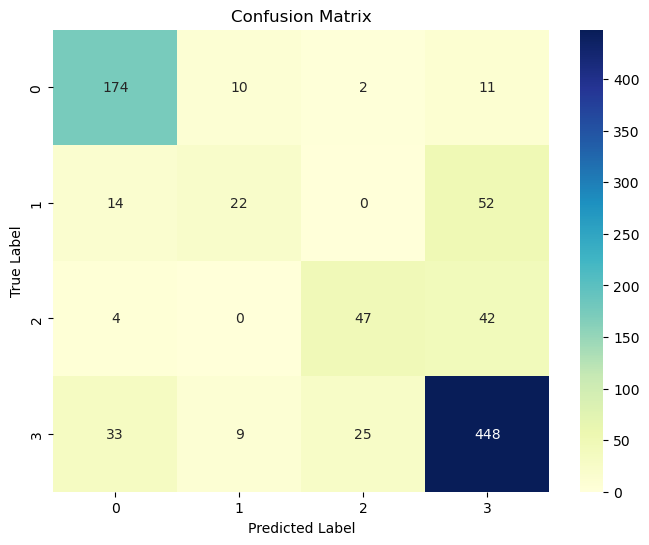

In [19]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()